In [1]:
import pandas  as pd
import  numpy as  np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt

In [ ]:
# Forecast sales  for  1 year  of  the  product  Furniture on the  basis  of  historic data .

In [2]:
#Reading the data
df=pd.read_excel(r'C:\Users\Lenovo\Documents\Data science\python\timeseries\Sample - Superstore.xls',header=0,index_col=0)

In [3]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 20)

In [4]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
# as the  problem statement clearly  specifies that the sales forecast is  only  for the category 'furniture' 
# so we are creating  new dataframe  with  only  furniture  data 
furniture=df.loc[df.Category=='Furniture']

In [6]:
furniture.shape

(2121, 20)

In [8]:
furniture.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
furniture.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [11]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [ ]:
# you can convert  any dtype  to  datetime using todatetime
#inorder to convert  object  to   datetime  
#pd.to_datetime(furniture['Order Date'])

# Timeseries preprocessing  

In [9]:
#1) singe  dimensional data
furniture=furniture[['Order Date','Sales']]

In [10]:
furniture.head()

,Order Date,Sales
Row ID,,
1,2016-11-08,261.9600
2,2016-11-08,731.9400
4,2015-10-11,957.5775
6,2014-06-09,48.8600
11,2014-06-09,1706.1840


In [11]:
#2) arrange the date time  variable into chronological  order 
furniture=furniture.sort_values('Order Date',ascending=True)

In [12]:
furniture.head(10)

,Order Date,Sales
Row ID,,
7475,2014-01-06,2573.820
7661,2014-01-07,76.728
867,2014-01-10,51.940
717,2014-01-11,9.940
2979,2014-01-13,545.940
4939,2014-01-13,333.999
6475,2014-01-14,61.960
971,2014-01-16,127.104
5466,2014-01-19,181.470


In [13]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [14]:
#3)grouping the data  based  on date 
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [15]:
furniture.shape

(889, 2)

In [16]:
#4)convert date/time variable as  index  
furniture=furniture.set_index('Order Date')

In [17]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [18]:
#5) for equal time intervals - we   will need to roll up to next levels as  there are data for few days  missing  in between
y=furniture['Sales'].resample('W').mean()

In [ ]:
#resample ('W')-weekly
#resample('M')-month end frequency
#resample('MS')-month start
#resample('Q')-Quarterly end
#resample('SM')- Semi month end freq, ie (15th and end  of  month)

In [19]:
y

Order Date
2014-01-12     678.107000
2014-01-19     312.618250
2014-01-26     551.986000
2014-02-02     311.833000
2014-02-09      14.560000
                 ...     
2017-12-03    2286.881714
2017-12-10    1465.734000
2017-12-17     773.303167
2017-12-24    1212.340500
2017-12-31    1009.391200
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

In [20]:
y.shape

(208,)

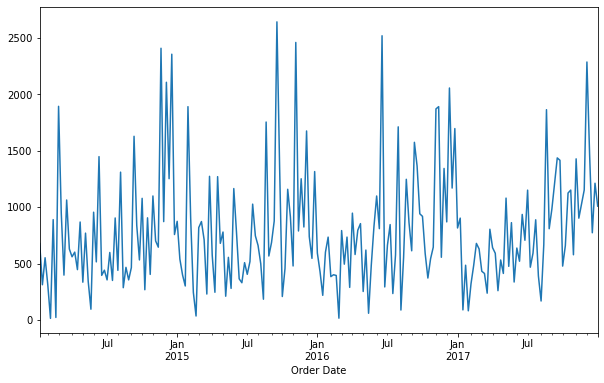

In [21]:
y.plot(figsize=(10,6))
plt.show()

In [ ]:
# too many  peaks and troughs , so we resample to higher value


In [22]:
y=furniture.Sales.resample('MS').mean()
print(y.shape)
print(y)

(48,)
Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.17

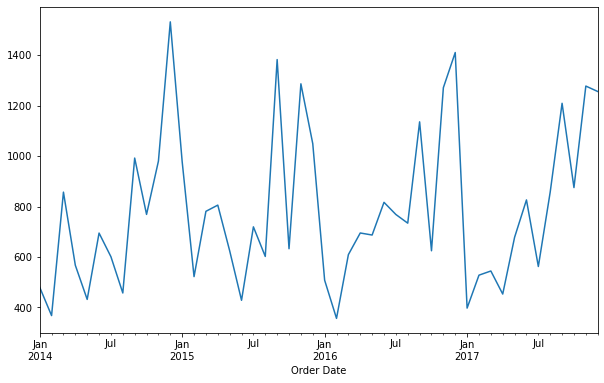

In [23]:
y.plot(figsize=(10,6))
plt.show()

In [ ]:
#analysing the  model we see 1) there is a trend  every year and a sesanality  repeating every year .  The  ideal model would  be a exponential  smoothning  -3 rd  order  or  holts-winter  model.  

In [ ]:
#Splitting the data  into Training and Testing

In [24]:
train=y.loc[:'2016-12-01 ']
train.tail(12)

Order Date
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [25]:
test=y.loc['2017-01-01':]
test.tail(12)

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

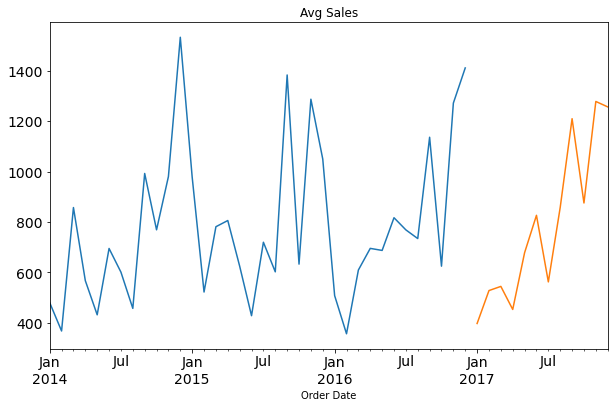

In [26]:
train.plot(figsize=(10,6),title='Avg sales',fontsize=14)
test.plot(figsize=(10,6),title='Avg Sales',fontsize=14)
plt.show()

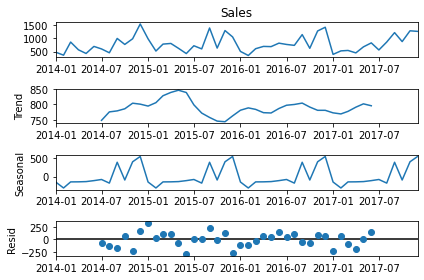

In [27]:
# to check which  model has to be used.  -check for the  components  in the data - ie trend and seasonality 
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(y)
fig=decomposition.plot()
plt.show()

In [ ]:
# - there  is  no ascending the  mountain  or descending the  mountain graph that  means  no trend  
#- THERE IS seasonality in the data .
# the  patter repeats  afte ever 12  months  ie  a for  every 12  period  there  is a  pattern.

In [ ]:
#ExponentialSmoothing -3rd  order 

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


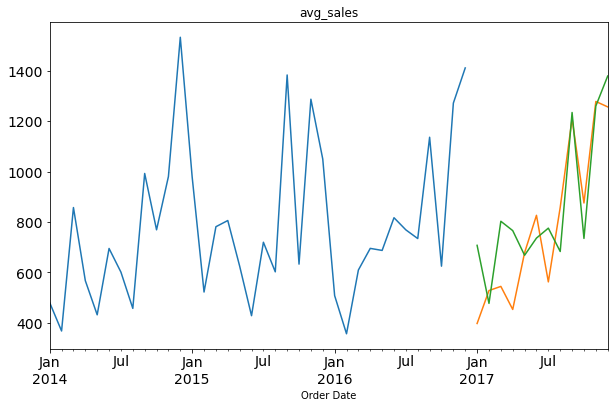

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter=test.copy()
fit1=ExponentialSmoothing(train, seasonal_periods=12,trend='add',seasonal='add').fit()
Holt_Winter['Seasonality']=fit1.forecast(steps=len(test))
train.plot(figsize=(10,6),title='avg_sales',fontsize=14)
test.plot(figsize=(10,6),title='avg_sales',fontsize=14)
Holt_Winter.Seasonality.plot(figsize=(10,6),title='avg_sales',fontsize=14)
plt.show()

In [ ]:
# hyper parametrs  gama = trend nad seasonality -additive  if data is steady  but  if exponential rising data , then trend  and seasonal will b MUL or  multiplicative model
# since in the hyperparametrs there are  not  much cnage  in any values ,etc, the  metrics  used for evaluation  is  rmse and not AIC.

In [29]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test,Holt_Winter.Seasonality) )
print(rmse)

178.60710645382778


In [30]:
fit1.aic

399.64125243413383

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


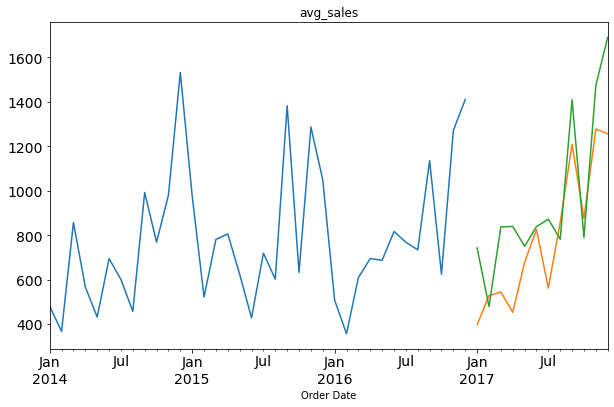

In [37]:
#checking  with  multiplicative  model 
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter=test.copy()
fit1=ExponentialSmoothing(train, seasonal_periods=12,trend='mul',seasonal='mul').fit()
Holt_Winter['Seasonality']=fit1.forecast(steps=len(test))
train.plot(figsize=(10,6),title='avg_sales',fontsize=14)
test.plot(figsize=(10,6),title='avg_sales',fontsize=14)
Holt_Winter.Seasonality.plot(figsize=(10,6),title='avg_sales',fontsize=14)
plt.show()

In [39]:
fit1.aic

420.48148104601097

In [40]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test,Holt_Winter.Seasonality) )
print(rmse)

248.15753025330739


In [ ]:
# so the addtitive  model works  and  the model suited would  be  

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


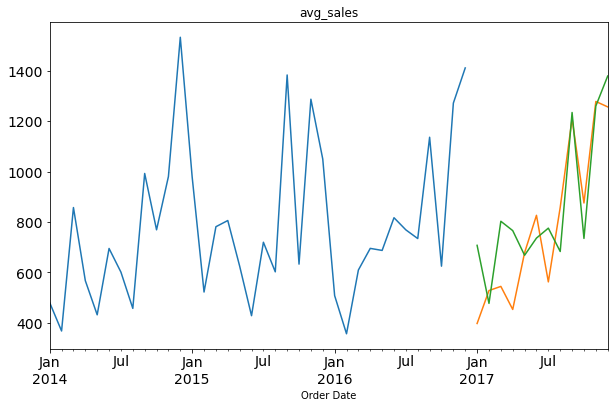

In [31]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter=test.copy()
fit1=ExponentialSmoothing(train, seasonal_periods=12,trend='add',seasonal='add').fit()
Holt_Winter['Seasonality']=fit1.forecast(steps=len(test))
train.plot(figsize=(10,6),title='avg_sales',fontsize=14)
test.plot(figsize=(10,6),title='avg_sales',fontsize=14)
Holt_Winter.Seasonality.plot(figsize=(10,6),title='avg_sales',fontsize=14)
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(test,Holt_Winter.Seasonality) )
print(rmse)

178.60710645382778


In [ ]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ- using auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

In [33]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#1)Identification

In [35]:
import pmdarima as pm

In [36]:
model=pm.auto_arima(y,start_p=0, max_p=3, start_d=None, max_d=2, start_q=0, max_q=3,
                    start_P=0, max_P=3, start_D=None,max_D=2, start_Q=0, max_Q=3,
                   max_order=12, m=12, seasonal=True, test='adf',
                    information_criterion='aic', Trace=True, random_state=10)

In [37]:
model

ARIMA(order=(3, 2, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
#2)Estimation

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

In [ ]:
#3)Validation - so we  use  01/01/2017 to predict for that yyear. we are validating.

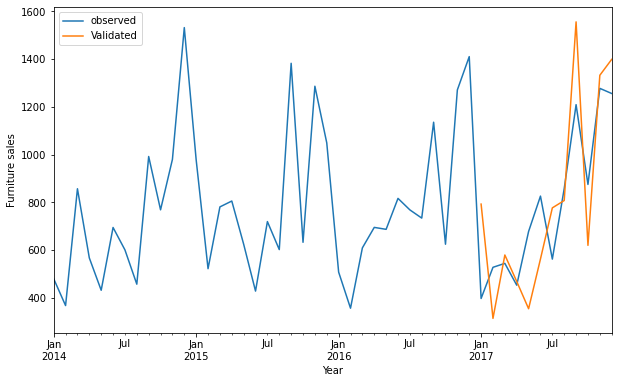

In [40]:
pred=model.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax=y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Validated')#pred.predicted_mean  =y_pred
ax.set_xlabel('Year')
ax.set_ylabel('Furniture sales')
plt.legend()
plt.show()

In [41]:
pred.predicted_mean

Order Date
2017-01-01     792.949433
2017-02-01     314.265633
2017-03-01     579.803137
2017-04-01     468.932398
2017-05-01     354.687211
2017-06-01     562.948852
2017-07-01     777.172661
2017-08-01     807.929701
2017-09-01    1556.342083
2017-10-01     620.158823
2017-11-01    1332.648303
2017-12-01    1399.290962
Freq: MS, Name: predicted_mean, dtype: float64

In [42]:
y_pred=pred.predicted_mean
y_test=y['2017-01-01':]


In [43]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

230.0628523300859


In [ ]:
# Holt winter gavve  us  lesser rmse  than the  SARIMA model.  hence the final  model to be  used  wud  be  Holt-Winter  model 

In [ ]:
#4)Forecasting for future   time  period.# ie  to forecast for   the  next  year  ie  2018

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


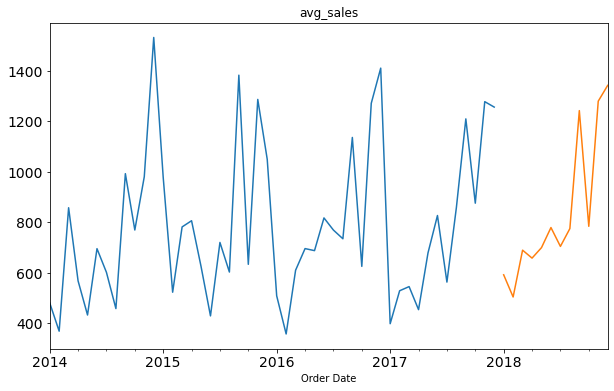

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter=test.copy()
fit1=ExponentialSmoothing(y, seasonal_periods=12,trend='add',seasonal='add').fit()
y_predictions=fit1.forecast(steps=12)
y.plot(figsize=(10,6),title='avg_sales',fontsize=14)
y_predictions.plot(figsize=(10,6),title='avg_sales',fontsize=14)
plt.show()

In [45]:
y_predictions

2018-01-01     591.474171
2018-02-01     503.545592
2018-03-01     689.088264
2018-04-01     657.604528
2018-05-01     699.153569
2018-06-01     778.760923
2018-07-01     704.027062
2018-08-01     774.672485
2018-09-01    1242.296454
2018-10-01     783.669071
2018-11-01    1279.757822
2018-12-01    1342.394152
Freq: MS, dtype: float64

In [46]:
y_predictions.to_excel('Timeseries2018.xlsx',index=True)